In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd



X, _ = make_blobs(n_samples=100_000,centers=3, n_features=3)
df = pd.DataFrame(X, columns=["x1", "x2", "x3"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

/home/bule/TramDag/utils/tramdag.py:244: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


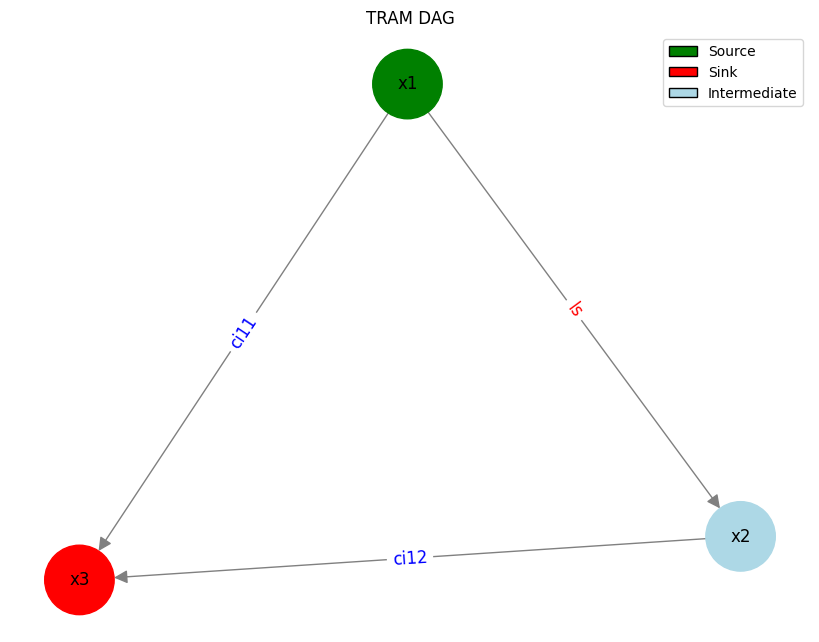

In [2]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/create_configration_test/configuration.json")
cfg.plot_dag()

device='cpu'



In [3]:

td_model = TramDagModel.from_config(cfg, set_initial_weights=True,verbose=True,debug=False,device=device,initial_data = train_df) 

[INFO] Initialized intercept model with preinitialized weights: SimpleIntercept(
  (fc): Linear(in_features=1, out_features=20, bias=False)
)
[INFO] Initialized intercept model with preinitialized weights: SimpleIntercept(
  (fc): Linear(in_features=1, out_features=20, bias=False)
)
[INFO] Initialized intercept model with preinitialized weights: ComplexInterceptDefaultTabular(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=8, out_features=20, bias=False)
)


In [4]:
td_model.fit(train_df, val_df,
             epochs=20,batch_size=100_000,
             verbose=False,debug=False,
             device=device,
             train_mode = "multiprocess")#,

[Parallel(n_jobs=3)]: Using backend MultiprocessingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   38.9s finished


{'x1': None, 'x2': None, 'x3': None}

In [5]:
samples, latents = td_model.sample(number_of_samples=5000)

Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x2/sampling
Deleted directory: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x3/sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x1 from standard logistic distribution
[WARNING] target_col 'x1' not in DataFrame columns — is this intended to be used as a Sampler?


Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 322.13it/s]


----*----------*-------------*--------Sample Node: x2 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x2 from standard logistic distribution
[WARNING] target_col 'x2' not in DataFrame columns — is this intended to be used as a Sampler?



Chandrupatla root finding: 100%|██████████| 10000/10000 [00:31<00:00, 322.08it/s]


----*----------*-------------*--------Sample Node: x3 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x3 from standard logistic distribution
[WARNING] target_col 'x3' not in DataFrame columns — is this intended to be used as a Sampler?



Chandrupatla root finding: 100%|██████████| 10000/10000 [00:30<00:00, 331.18it/s]
